imports


In [101]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import missingno as msno
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [102]:
df =  pd.read_csv("diabetes.csv")

In [103]:
df.shape

(768, 9)

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int64       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

mossing number 

<Axes: >

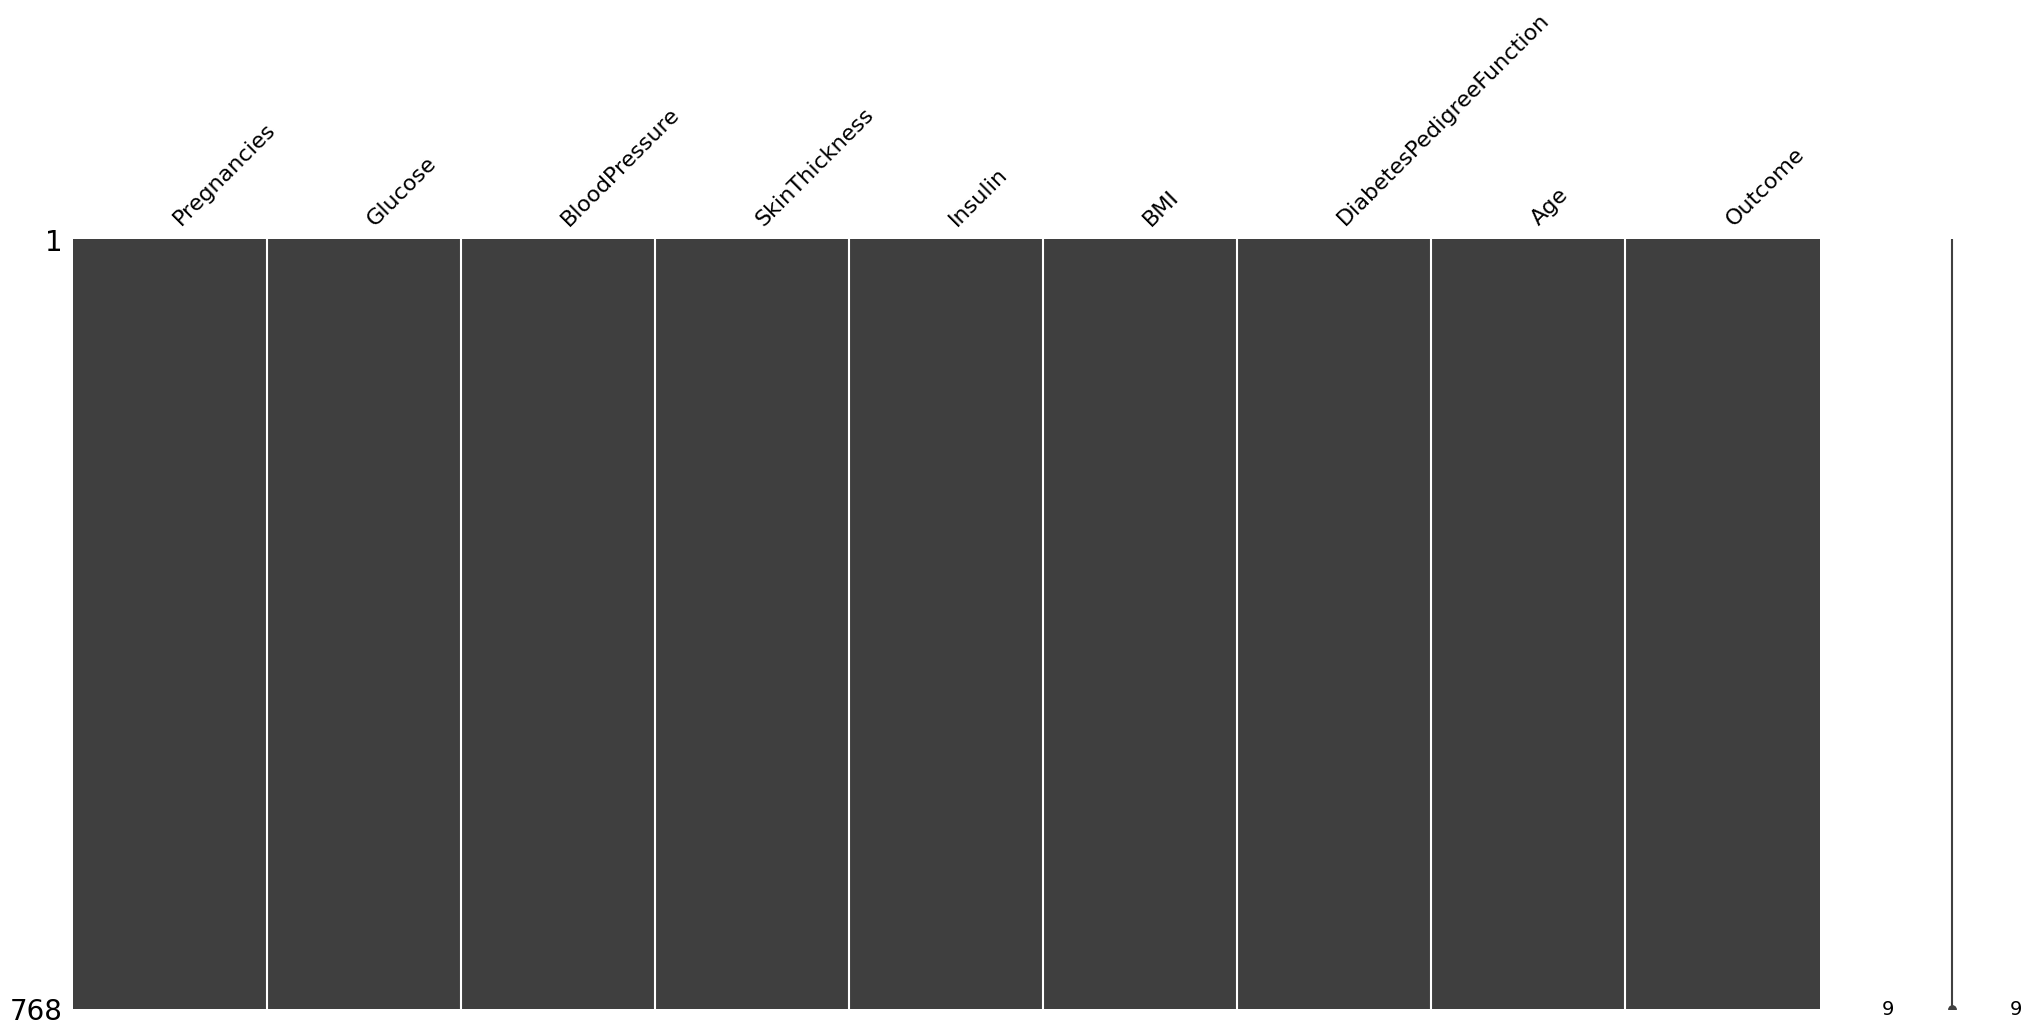

In [106]:
msno.matrix(df)

In [107]:
df['Insulin'].iloc[8:10]= np.nan

<Axes: >

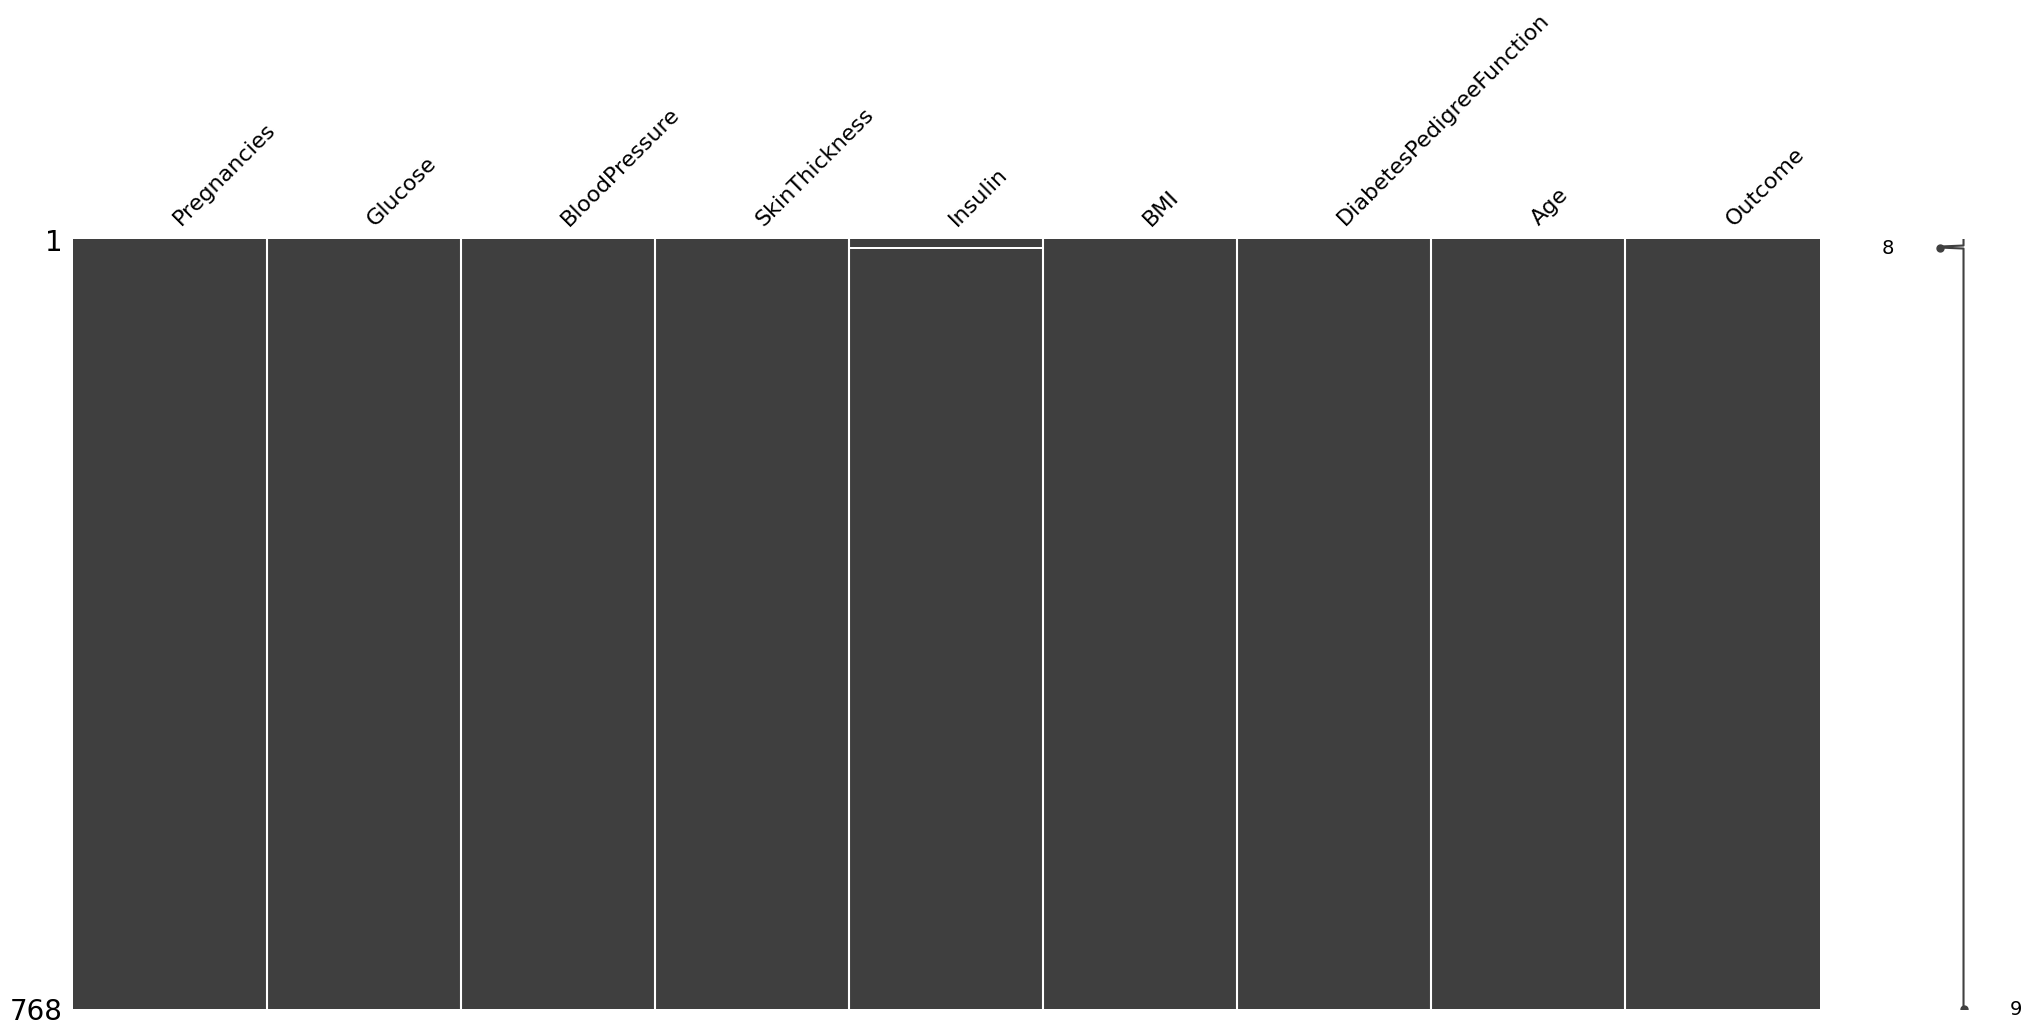

In [108]:
msno.matrix(df)

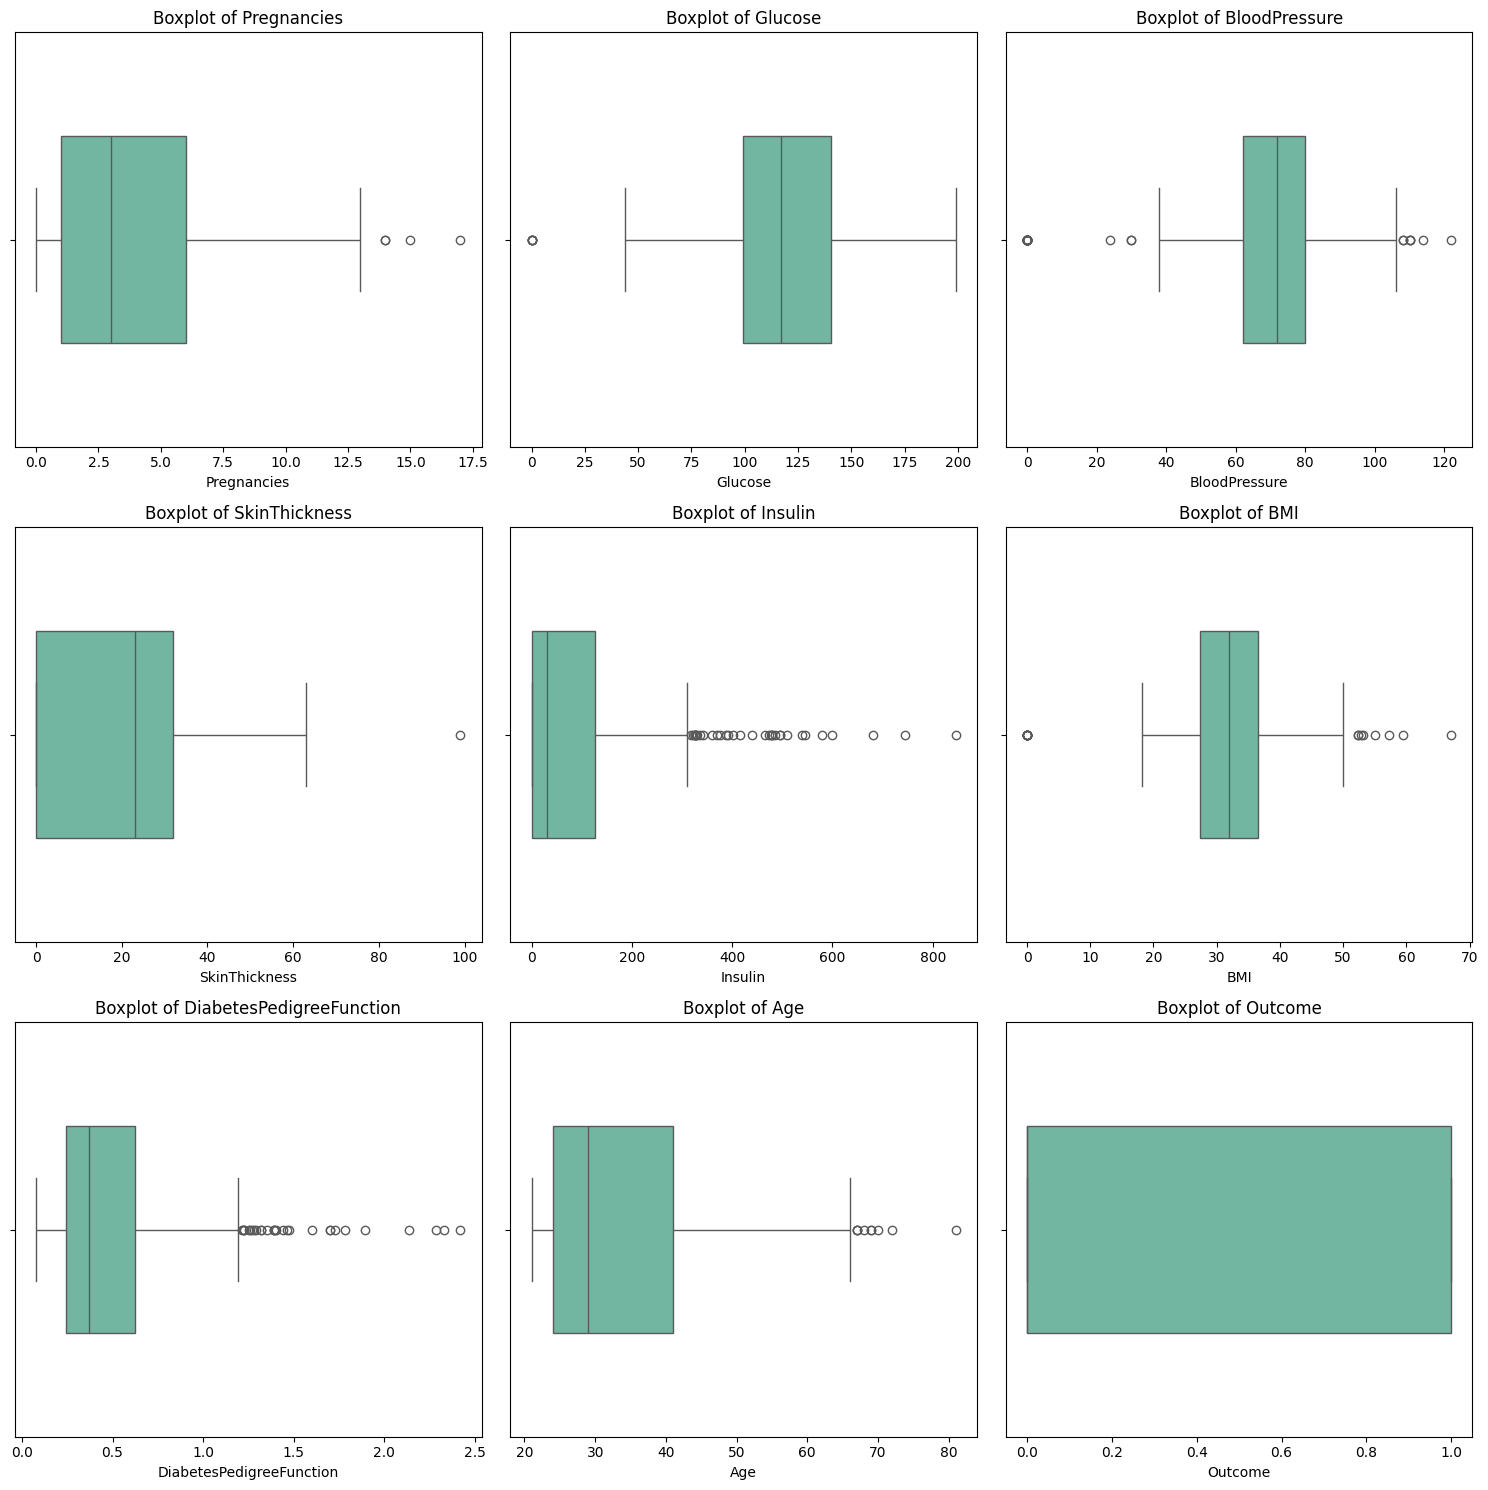

In [109]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='Set2', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout()       


<Axes: xlabel='SkinThickness'>

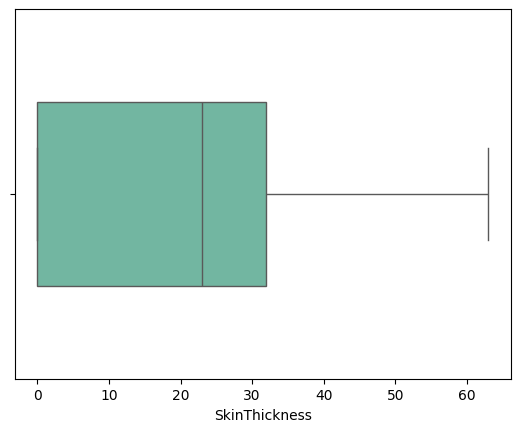

In [110]:
df = df[df.SkinThickness <70]
sns.boxplot(x=df['SkinThickness'], palette='Set2', width=0.5)

Number of outliers in bmi: 19


<Axes: xlabel='BMI'>

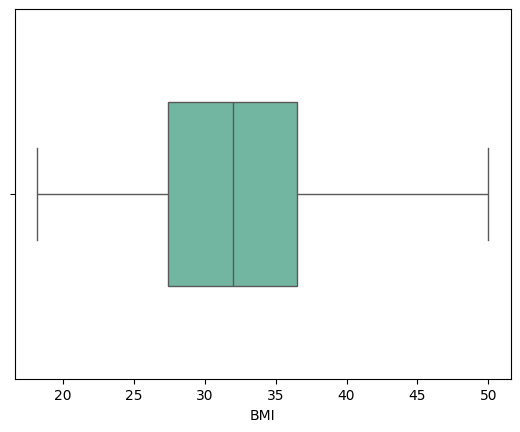

In [111]:
data = df['BMI']
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Number of outliers in bmi:", len(outliers))
# Remove outliers
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

sns.boxplot(x=df['BMI'], palette='Set2', width=0.5)

In [112]:
# remove outliers fron the whole dataset
for col in numeric_cols:
    data = df[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape

(631, 9)

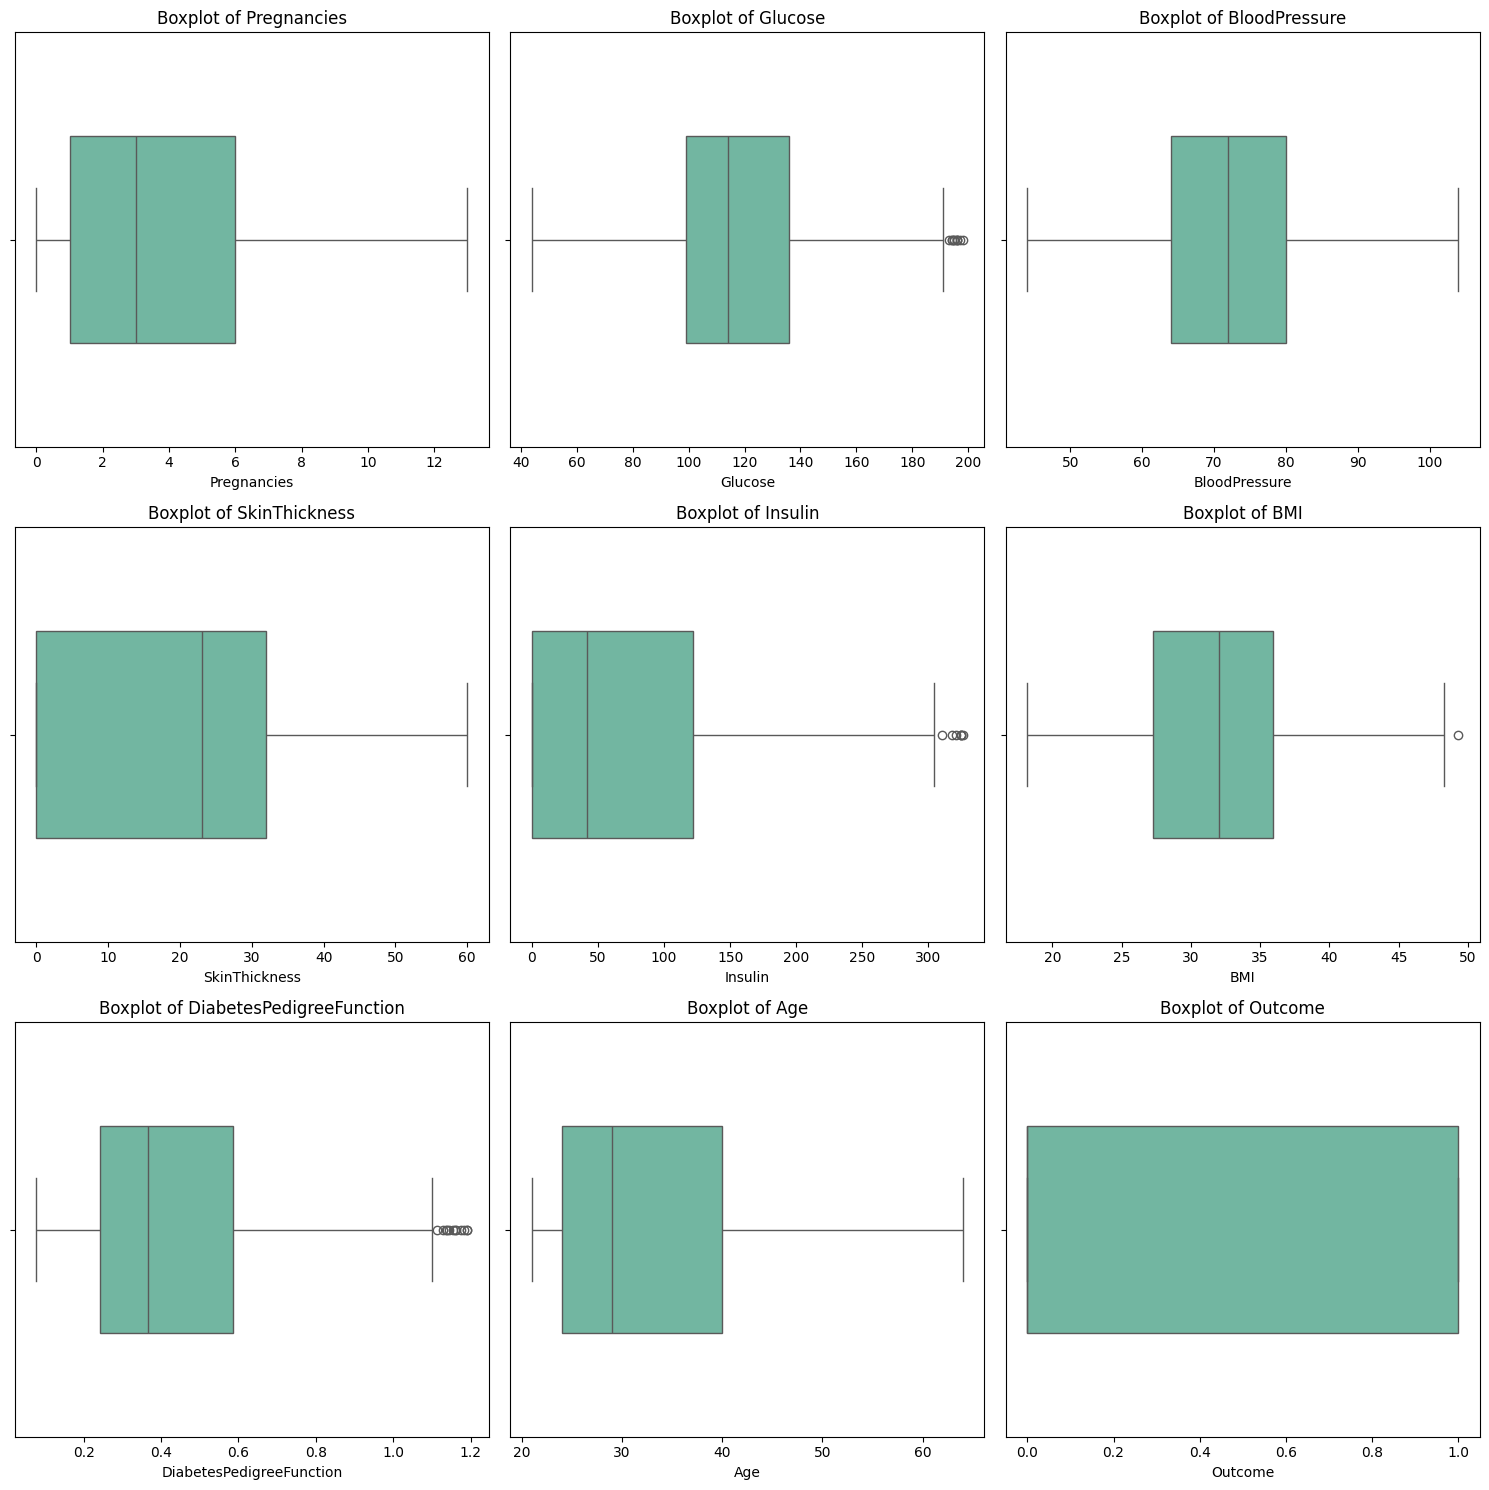

In [113]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='Set2', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout()  

In [114]:
data = df['Glucose']
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data < lower_bound) | (data > upper_bound)]
print("Number of outliers in GLUCOSE:", len(outliers))
df = df[(df['Glucose'] >= lower_bound) & (df['Glucose'] <= upper_bound)]


Number of outliers in GLUCOSE: 10


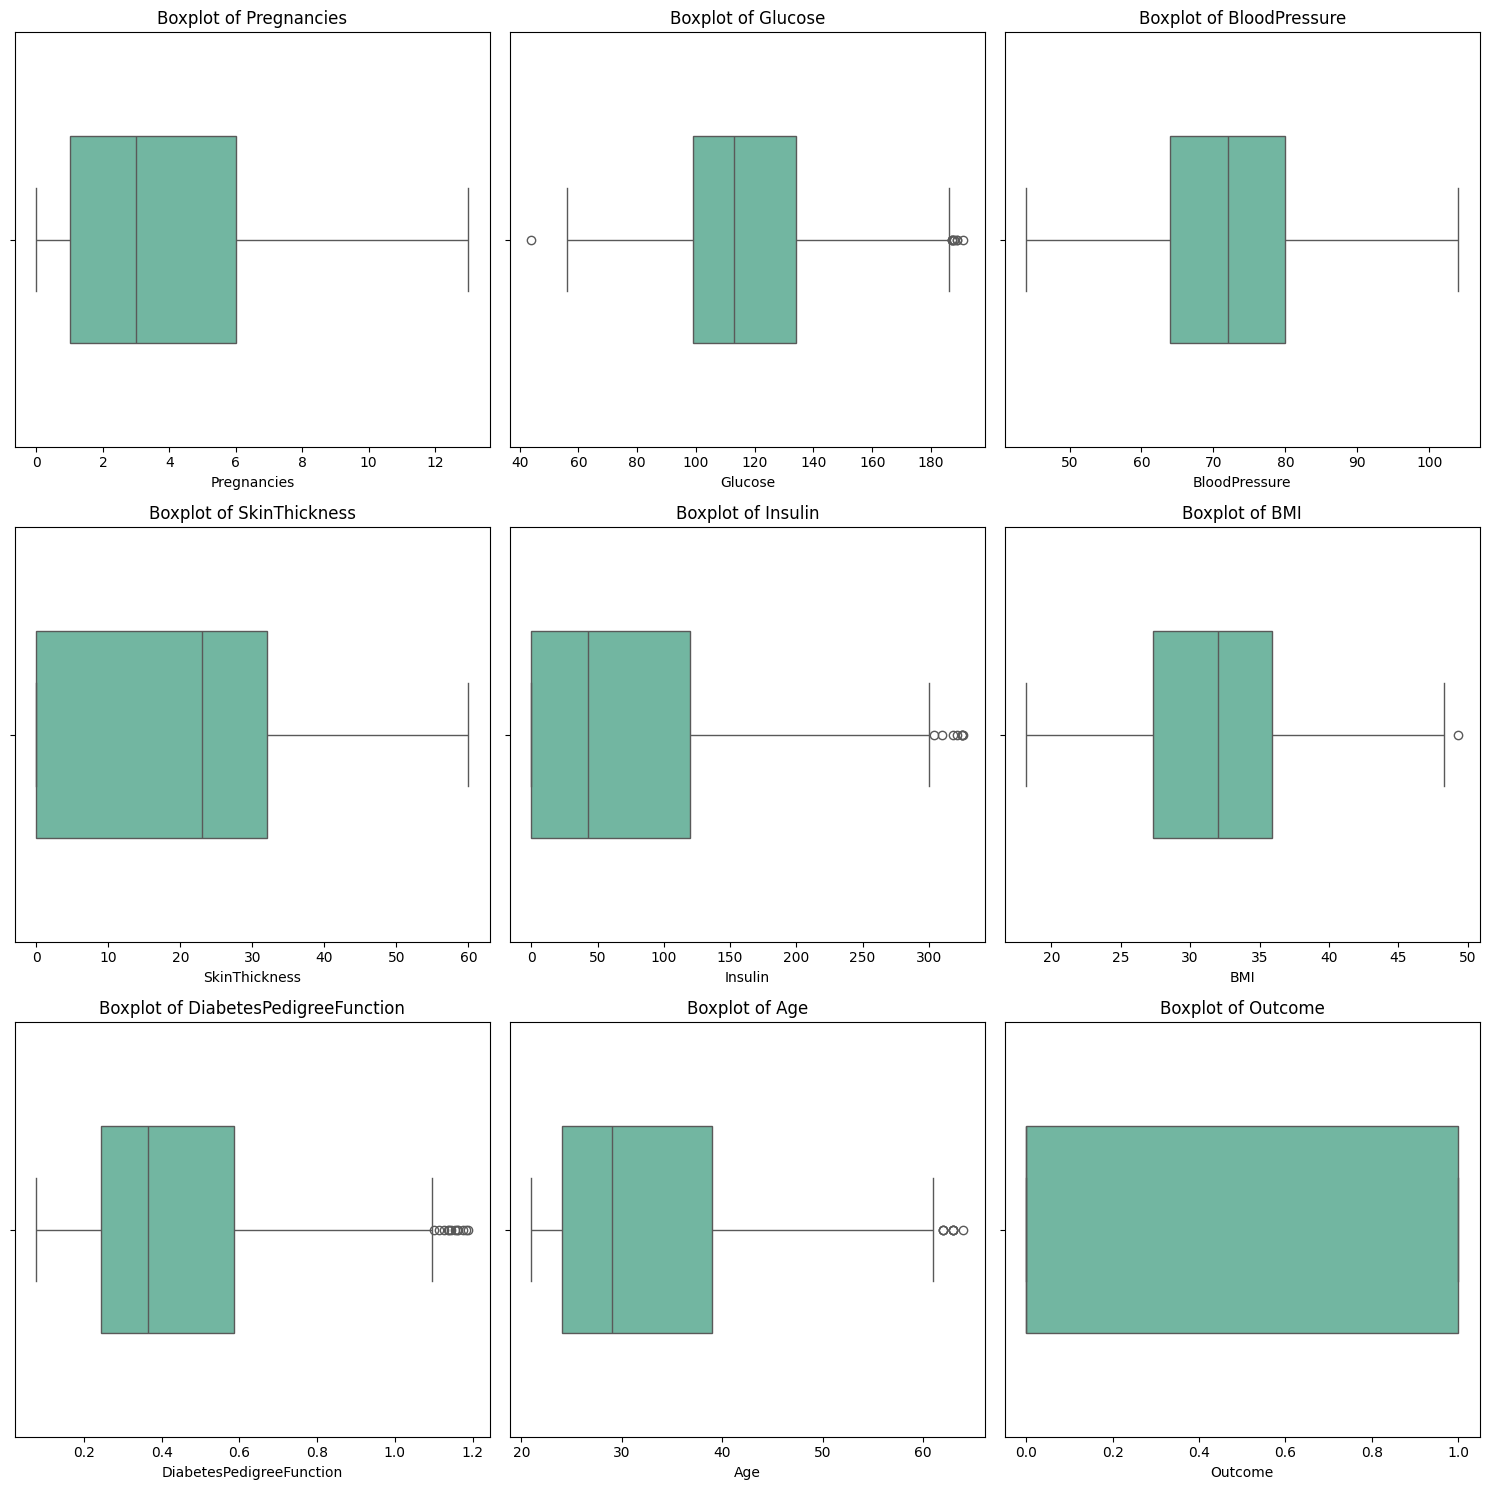

In [115]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='Set2', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout()

In [116]:
fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
fig.show()

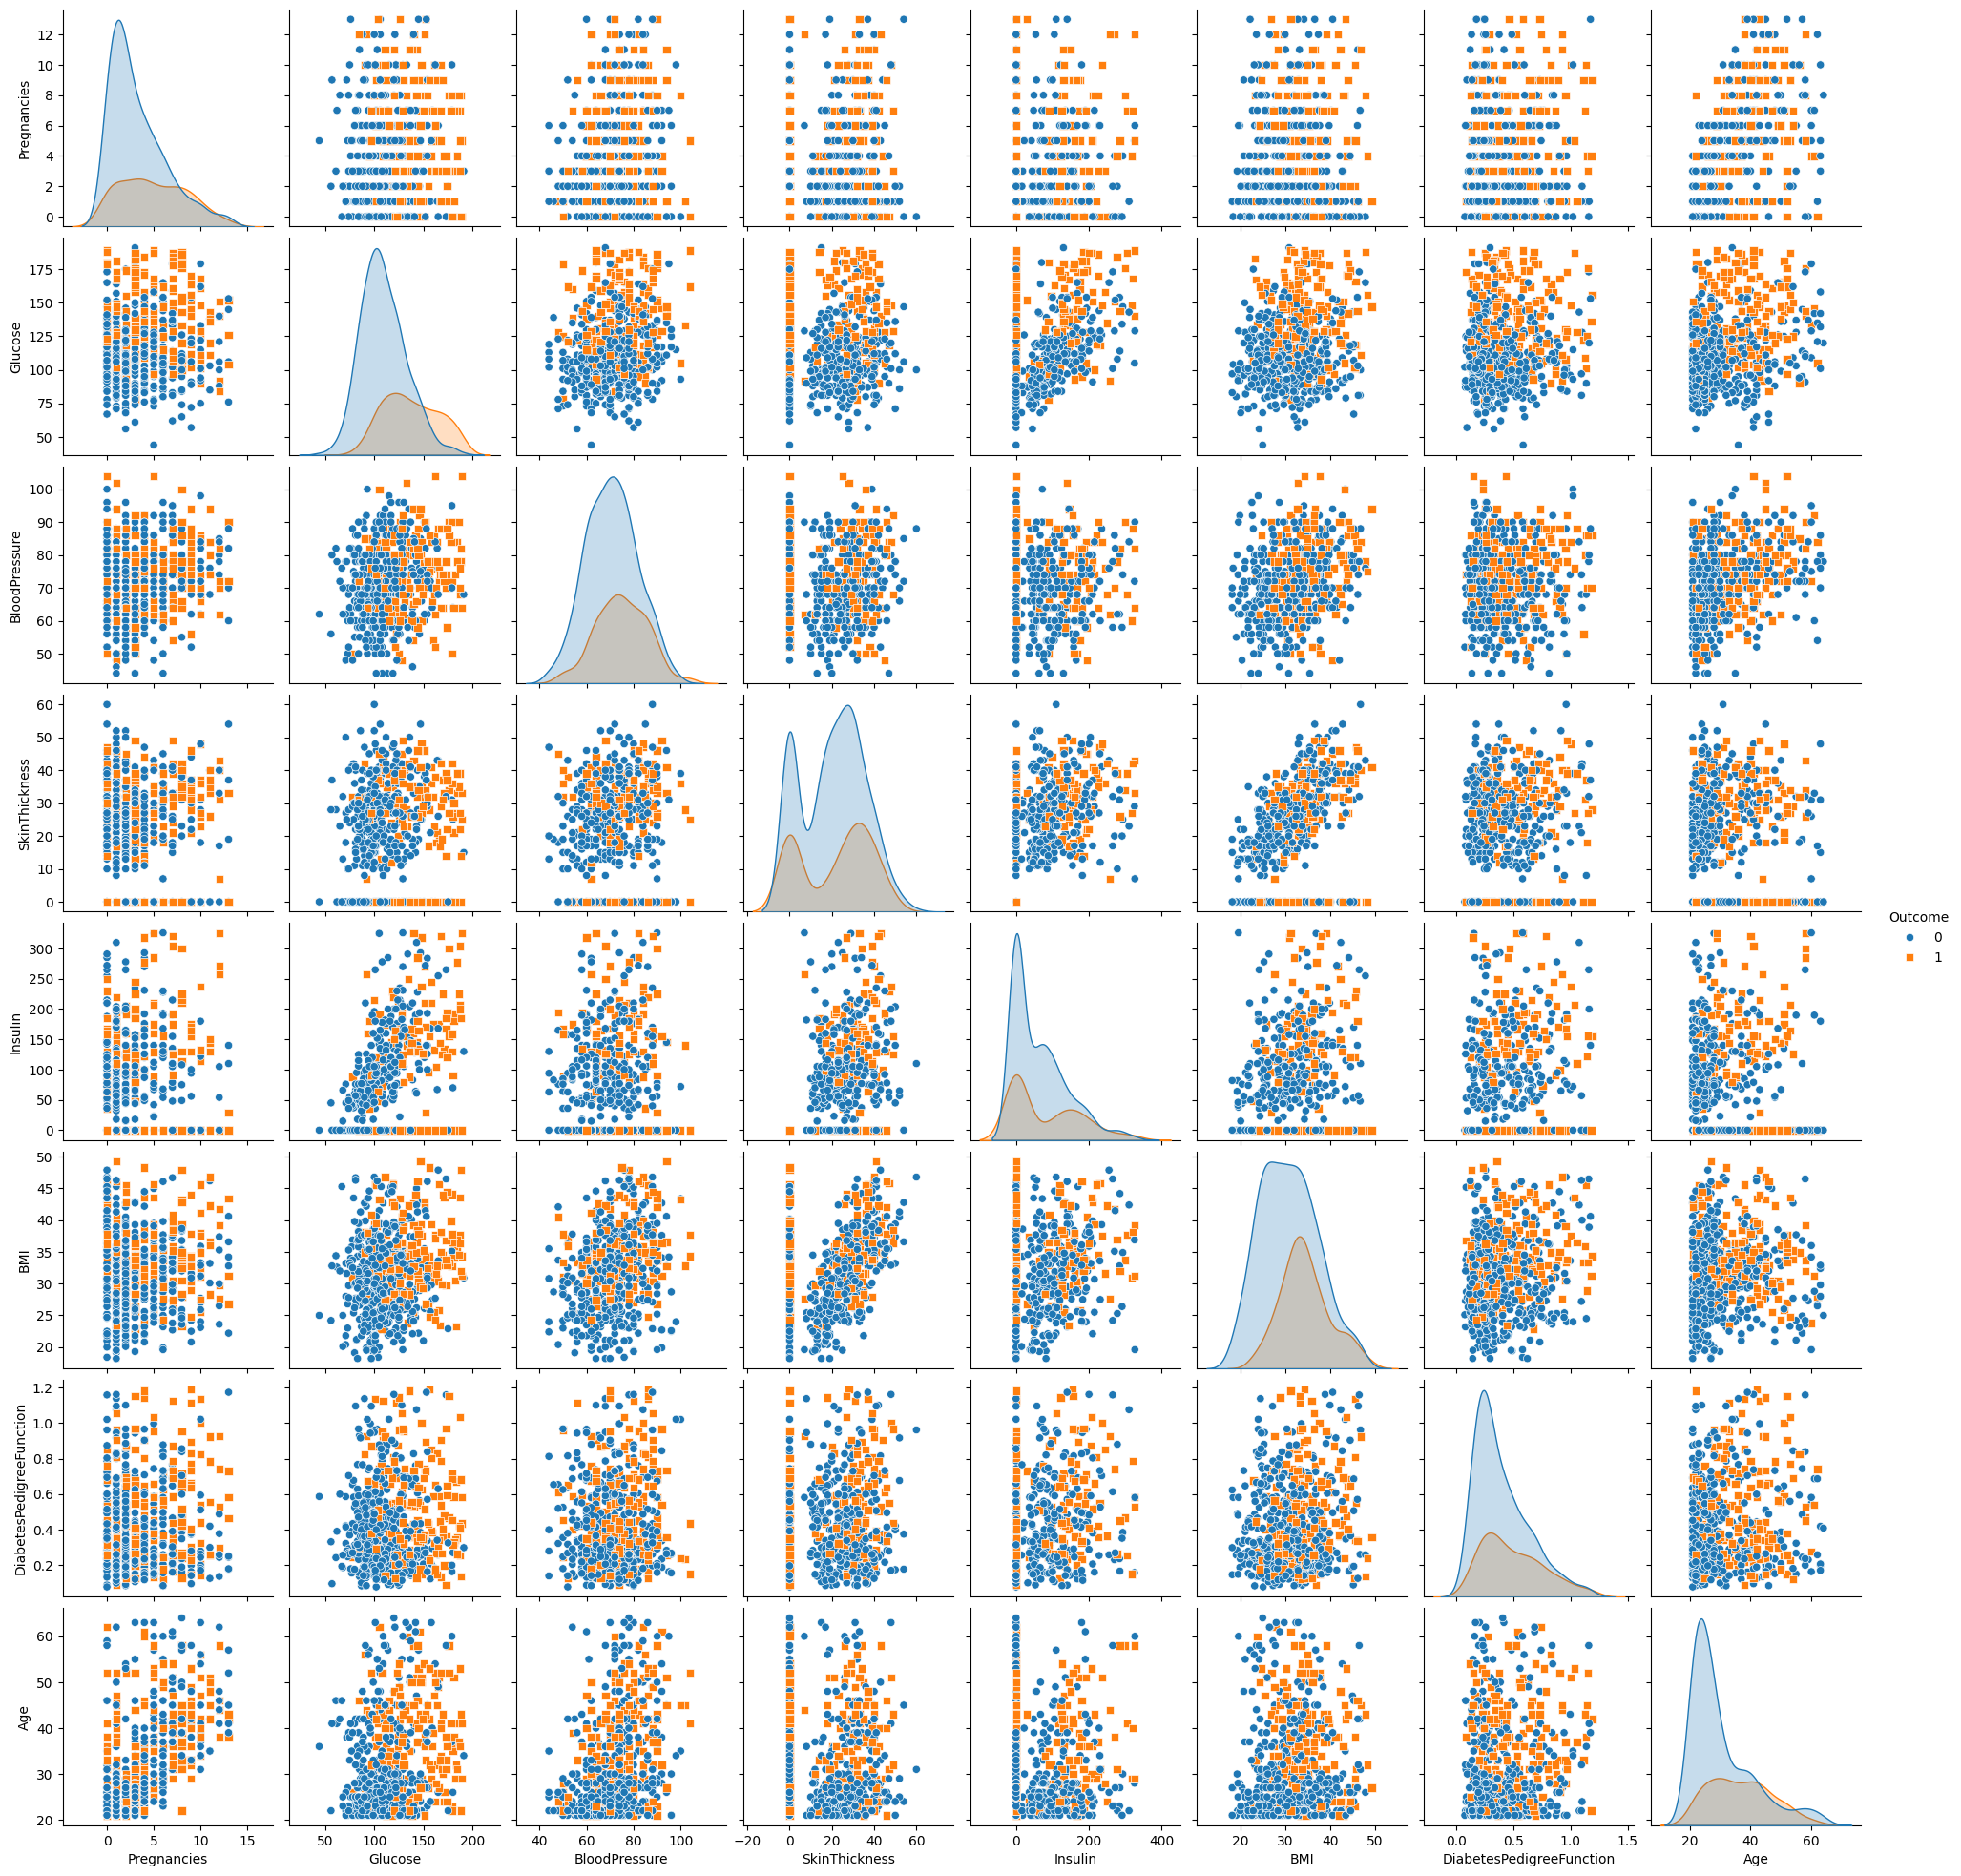

In [117]:
sns.pairplot(df, hue='Outcome', diag_kind='kde', markers=["o", "s"], height=2.5)

In [118]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)



Training set shape: (496, 8)
Test set shape: (125, 8)


MODELLING

In [120]:
operatios = [('scalar',StandardScaler()),('RF_model',RandomForestClassifier(random_state=42))]
RF_model = Pipeline(steps=operatios)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.776
F1 Score: 0.6
Recall: 0.5526315789473685
Precision: 0.65625


In [121]:
prob = RF_model.predict_proba(X_test)[:, 1]
print(prob)

[0.3  0.02 0.16 0.52 0.08 0.67 0.66 0.42 0.1  0.   0.12 0.18 0.55 0.33
 0.67 0.08 0.43 0.06 0.69 0.21 0.4  0.16 0.77 0.12 0.25 0.34 0.29 0.61
 0.52 0.27 0.54 0.74 0.34 0.13 0.01 0.77 0.53 0.18 0.03 0.04 0.15 0.
 0.01 0.81 0.12 0.21 0.16 0.62 0.63 0.48 0.29 0.25 0.17 0.52 0.01 0.17
 0.51 0.7  0.35 0.08 0.16 0.29 0.44 0.01 0.05 0.09 0.05 0.08 0.2  0.21
 0.62 0.2  0.35 0.22 0.35 0.13 0.59 0.5  0.01 0.12 0.19 0.37 0.38 0.9
 0.15 0.3  0.66 0.41 0.4  0.06 0.11 0.39 0.43 0.02 0.02 0.   0.15 0.7
 0.01 0.17 0.03 0.02 0.02 0.32 0.33 0.01 0.59 0.63 0.19 0.45 0.14 0.55
 0.49 0.57 0.77 0.04 0.08 0.01 0.67 0.43 0.79 0.88 0.11 0.28 0.42]


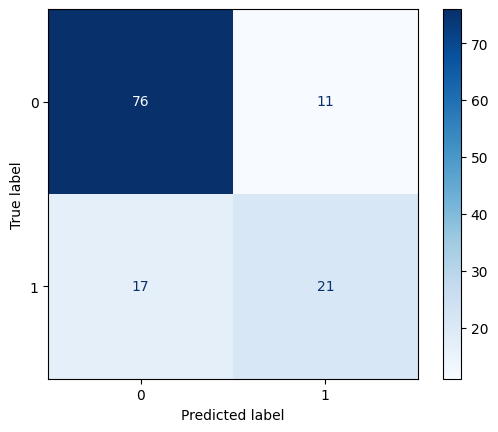

In [122]:
confusion_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix, display_labels=RF_model.classes_).plot(cmap='Blues')




In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        87
           1       0.66      0.55      0.60        38

    accuracy                           0.78       125
   macro avg       0.74      0.71      0.72       125
weighted avg       0.77      0.78      0.77       125

